<a href="https://colab.research.google.com/github/AntoniaSch/Facial-Keypoints-Detector/blob/master/Facial_Keypoints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading and exploring the data

In [0]:
train = pd.read_csv('/content/training.csv')  
test = pd.read_csv('/content/test.csv')

As we can see in the following our datasets contains values for x and y axis of various keypoints in a face. The last column contains the values of each pixel from the actual face image.

In [129]:
train.head().T

,0,1,2,3,4
left_eye_center_x,66.0336,64.3329,65.0571,65.2257,66.7253
left_eye_center_y,39.0023,34.9701,34.9096,37.2618,39.6213
right_eye_center_x,30.227,29.9493,30.9038,32.0231,32.2448
right_eye_center_y,36.4217,33.4487,34.9096,37.2618,38.042
left_eye_inner_corner_x,59.5821,58.8562,59.412,60.0033,58.5659
left_eye_inner_corner_y,39.6474,35.2743,36.321,39.1272,39.6213
left_eye_outer_corner_x,73.1303,70.7227,70.9844,72.3147,72.5159
left_eye_outer_corner_y,39.97,36.1872,36.321,38.381,39.8845
right_eye_inner_corner_x,36.3566,36.0347,37.6781,37.6186,36.9824
right_eye_inner_corner_y,37.3894,34.3615,36.321,38.7541,39.0949


In [130]:
train.drop('Image', axis = 1).head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,24.976421,36.603221,55.742526,27.570947,78.887368,32.651621,42.193895,28.135453,16.791158,32.087116,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,25.307270,38.007903,56.433809,30.929864,77.910261,31.665725,41.671513,31.049990,20.458017,29.909343,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,22.506110,38.305237,57.249571,30.672177,77.762945,31.737247,38.035436,30.935382,15.925870,30.672177,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166


When looking for **missing values** we encountered some in three columns of the dataset:

In [131]:
train.isnull().any().value_counts()

True     28
False     3
dtype: int64

For Image data the **ffill-method** is quite common as it is filling it with the value in the Forward index or Previous/Back respectively.

In [0]:
train.fillna(method = 'ffill',inplace = True)

# Get Image - Data
Let's get now one of the 7049 images in our dataset printed! First of all we need to understand the size of the image and 9216 is indicating a 96x96 image.

In [133]:
images = []
for i in range(0,7049):
    image = train['Image'][i].split(' ')
    images.append(image)
images = np.array(images,dtype = 'float')
images.shape

(7049, 9216)

So we need to reshape the images to proceed to have 7049 samples with 96 x and 96 y values 

In [134]:
X_train = images.reshape(7049,96,96,1) 
X_train.shape

(7049, 96, 96, 1)

# Get Label - Data
The keypoints are stored in the following Dataframe showing we have 7049 faces with 15 keypoints each and the two corresponding values for x and y axis.

In [135]:
keypoints = train.drop(['Image'], axis=1)
keypoints.shape

(7049, 30)

In [160]:
keypoints.head(4).T

,0,1,2,3
left_eye_center_x,66.033564,64.332936,65.057053,65.225739
left_eye_center_y,39.002274,34.970077,34.909642,37.261774
right_eye_center_x,30.227008,29.949277,30.903789,32.023096
right_eye_center_y,36.421678,33.448715,34.909642,37.261774
left_eye_inner_corner_x,59.582075,58.856170,59.412000,60.003339
left_eye_inner_corner_y,39.647423,35.274349,36.320968,39.127179
left_eye_outer_corner_x,73.130346,70.722723,70.984421,72.314713
left_eye_outer_corner_y,39.969997,36.187166,36.320968,38.380967
right_eye_inner_corner_x,36.356571,36.034723,37.678105,37.618643
right_eye_inner_corner_y,37.389402,34.361532,36.320968,38.754115


For example the first image has the following values for the x - coordinate of each keypoint:

In [136]:
keypoints.iloc[0,0::2]

left_eye_center_x            66.033564
right_eye_center_x           30.227008
left_eye_inner_corner_x      59.582075
left_eye_outer_corner_x      73.130346
right_eye_inner_corner_x     36.356571
right_eye_outer_corner_x     23.452872
left_eyebrow_inner_end_x     56.953263
left_eyebrow_outer_end_x     80.227128
right_eyebrow_inner_end_x    40.227609
right_eyebrow_outer_end_x    16.356379
nose_tip_x                   44.420571
mouth_left_corner_x          61.195308
mouth_right_corner_x         28.614496
mouth_center_top_lip_x       43.312602
mouth_center_bottom_lip_x    43.130707
Name: 0, dtype: float64

In [0]:
x = keypoints.iloc[7,0::2].values
y = keypoints.iloc[7,1::2].values

Using matplotlibs function *imshow* we get the image in a gray-scale. Each value of the pixel indicated the color-value. Lets add the relevant keypoints with red dots too:

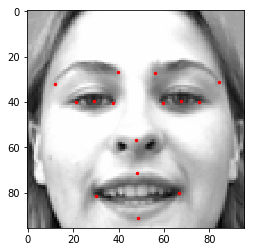

In [138]:
plt.imshow(X_train[7].reshape(96,96), cmap ='gray')
plt.scatter(x, y, c='red',s = 6);

Just like with the image (X_train) we need to get y_train too:

In [0]:
y_train = []
for i in range(0,7049):
    y = keypoints.iloc[i,:]
    y_train.append(y)
    
y_train = np.array(y_train,dtype = 'float')

A common practice when working with image data is as well rescaling the values:
Our images consist in RGB coefficients in the 0-255, but such values are quite high for our models to process, so we divide the values by 255 to get resulting values from 0 to 1. 

In [140]:
# Rescale
X_train = X_train/255
X_train[1]

array([[[0.85882353],
        [0.84313725],
        [0.8       ],
        ...,
        [0.36078431],
        [0.34509804],
        [0.32941176]],

       [[0.87058824],
        [0.85882353],
        [0.8627451 ],
        ...,
        [0.36078431],
        [0.34509804],
        [0.3372549 ]],

       [[0.90588235],
        [0.87843137],
        [0.83137255],
        ...,
        [0.30196078],
        [0.31372549],
        [0.32941176]],

       ...,

       [[0.00392157],
        [0.00392157],
        [0.00392157],
        ...,
        [0.00392157],
        [0.00392157],
        [0.00392157]],

       [[0.00392157],
        [0.00392157],
        [0.00392157],
        ...,
        [0.00392157],
        [0.00392157],
        [0.00392157]],

       [[0.00392157],
        [0.00392157],
        [0.00392157],
        ...,
        [0.00392157],
        [0.00392157],
        [0.00392157]]])

# Building the Neural Net

Just a quick reminder: A neural net consists of an input, some hidden layers and one output layer. Every layer contains several nodes or units that are linked to the previous or next layer by using weights. 
In the following we are going to use Keras to build the Neural Network. We are using a Sequential model which implies the layers are stacked linearly:


In [0]:
from keras.models import Sequential
model = Sequential()

Now lets add some layers to our model!
When working with image data the **Convolutional Neural Network** is a good way to tackle the problem. In contrast to others it is able to preserve the spatial relationship between pixels by small squares of input data. This is done by having a small window hovering over the entire image like this:

Instead of using the entire 96x96 image we use a 3x3 window to learn the image features. 

In [0]:
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D
model.add(Conv2D(filters = 48, kernel_size = (3,3), input_shape = (96,96,1), activation = 'relu'))

Next we are adding a MaxPooling layer

In [0]:
model.add(MaxPool2D(2,2))

Flattening is as its name is revealing: converting the matrix into a linear array so we can feed it into the nodes of the output layer.



In [0]:
model.add(Flatten())

Last but not least we define our output layer: As we have 15 keypoints and 2 axis our output layer needs to have 30 units. Dense layers are the regular or core layers of neurons in a neural net meaning every unit recieves input from all the neurons in the previous layer (=densely connected).

In [145]:
model.add(Dense(30, activation= 'relu'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 94, 94, 48)        480       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 47, 47, 48)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 106032)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 30)                3180990   
Total params: 3,181,470
Trainable params: 3,181,470
Non-trainable params: 0
_________________________________________________________________


Before fitting the model to our train data we need to compile it. This contains three components:
1. Optimizer used
2. Loss-Function of the model: MSE which we are trying to minimize
3. Metrics to evaluate the performance of the model.

In [0]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['acc'])

To speed up the process and prevent overfitting we add the Early Stopping function: If the validation accuracy does not improve in 10 epochs, we are going to stop training the model.

In [0]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_acc', patience=10)

In [166]:
epoch = 200
develop= model.fit(X_train,y_train,epochs = epoch,batch_size = 64, validation_split = 0.2, verbose = 2, callbacks = [early_stopping] )
develop # 128

Train on 5639 samples, validate on 1410 samples
Epoch 1/200
 - 64s - loss: 53.1013 - acc: 0.7877 - val_loss: 54.2091 - val_acc: 0.7397
Epoch 2/200
 - 63s - loss: 53.0631 - acc: 0.7842 - val_loss: 53.3283 - val_acc: 0.7270
Epoch 3/200
 - 64s - loss: 53.2691 - acc: 0.7867 - val_loss: 53.5269 - val_acc: 0.7326
Epoch 4/200
 - 64s - loss: 52.9164 - acc: 0.7868 - val_loss: 54.0781 - val_acc: 0.7340
Epoch 5/200
 - 64s - loss: 52.7362 - acc: 0.7936 - val_loss: 54.8299 - val_acc: 0.7411
Epoch 6/200
 - 65s - loss: 52.7643 - acc: 0.7902 - val_loss: 53.5597 - val_acc: 0.7411
Epoch 7/200
 - 65s - loss: 52.6434 - acc: 0.7969 - val_loss: 53.8146 - val_acc: 0.7454
Epoch 8/200
 - 64s - loss: 52.6730 - acc: 0.8019 - val_loss: 53.3688 - val_acc: 0.7418
Epoch 9/200
 - 63s - loss: 52.5457 - acc: 0.7955 - val_loss: 54.4027 - val_acc: 0.7539
Epoch 10/200
 - 65s - loss: 52.5006 - acc: 0.7930 - val_loss: 54.1558 - val_acc: 0.7156
Epoch 11/200
 - 66s - loss: 52.4717 - acc: 0.7939 - val_loss: 53.3213 - val_acc: 

In [179]:
train_loss, train_acc = model.evaluate(X_train,y_train)
train_acc

7049/7049 [==============================] - 18s 3ms/step


0.7886224996537955

The history of the model is stored within the develop.history - but as this is not very easy to compare, let's make some graphs out of it:

In [168]:
# Variable catching the number of epochs
epoch_len = max(develop.epoch)+2
epoch_len

20

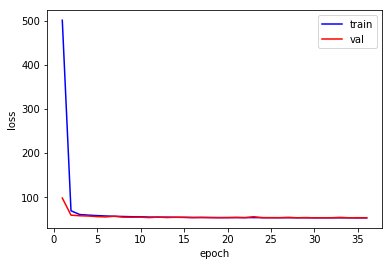

In [150]:
loss=develop.history['loss']
val_loss=develop.history['val_loss']
y=np.arange(1,(epoch_len))
plt.plot(y,loss,'b',label='train')
plt.plot(y,val_loss,'r',label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

In [0]:
y=np.arange(1,(epoch_len))
y

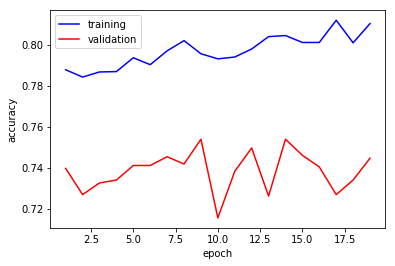

In [178]:
acc=develop.history['acc']
val_acc=develop.history['val_acc']
y=np.arange(1,(epoch_len))
plt.plot(y,acc,'b',label='training')
plt.plot(y,val_acc,'r',label='validation')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend();

In [0]:
model.save('FacialKeypoints.h5')

#Predicting 

In [153]:
test.head()
test.shape

(1783, 2)

In [154]:
images = []
for i in range(0,1783):
    image = test['Image'][i].split(' ')
    images.append(image)
    
images = np.array(images,dtype = 'float')
X_test = images.reshape(-1,96,96,1)
X_test.shape

(1783, 96, 96, 1)

In [0]:
predictions = model.predict(X_test/255)

In [0]:
predictions = pd.DataFrame(predictions)

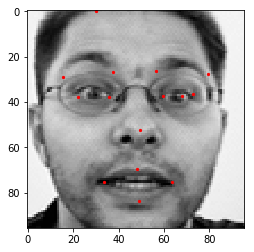

In [157]:
x = predictions.iloc[0,0::2].values
y = predictions.iloc[0,1::2].values

plt.imshow(X_test[0].reshape(96,96), cmap ='gray')
plt.scatter(x, y, c='red',s = 5);

In [0]:
model.save('FacialKeypoints.h5')

In [0]:
from keras.models import load_model
# model = load_model('FacialKeypoints.h5')

# Outlook

We could try to build a more sophisticated Neural Net, but this notebook aimed to get a general understanding rather than achieving the highest accuracy. Nonetheless, here are some ideas on how to improve the performance:

* Changing the number of convolutional layers and their number of nodes

* Tuning hyper-parameters like activation functions
